# Basic analysis

- Load the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('../data/emotions.csv')
data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
mapping = { 0: 'sadness',
           1: 'joy',
           2: 'love',
           3: 'anger',
           4: 'fear',
           5: 'surprise'}

data['label'].replace(mapping, inplace=True)
data.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_21584\2255664636.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['label'].replace(mapping, inplace=True)


,text,label
82480,i walked away feeling sort of impressed,surprise
385568,i have the feeling i am going to be tortured t...,anger
188639,ive been feeling rather helpless when it comes...,fear
309998,i have let myself down amp feel hurt,sadness
397763,i broke as i was when i was there feel insecure,fear
391265,i love feeling those sweet baby punches and kicks,love
93691,im feeling a bit disillusioned about well life...,sadness
211177,i would go on with more of what i disliked but...,sadness
153570,i desire to learn to ride this feeling this ec...,joy
25359,i know what i want and how to get it i wil go ...,love


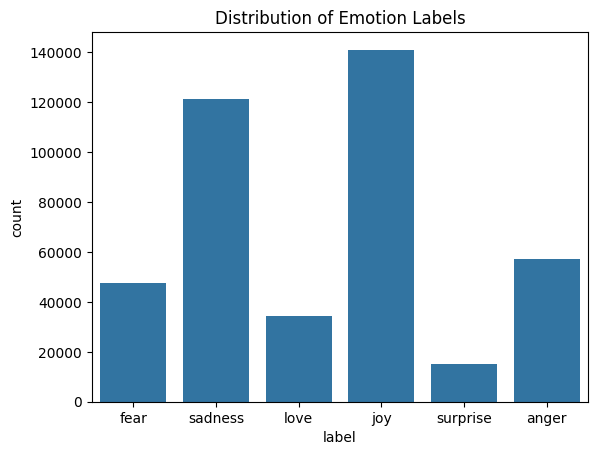

In [4]:
# Check labels
sns.countplot(x="label", data=data)
plt.title("Distribution of Emotion Labels")
plt.show()

<Axes: xlabel='word_count', ylabel='Count'>

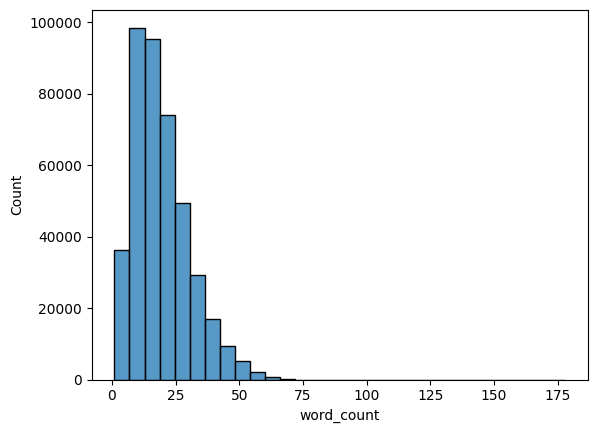

In [5]:
# Analyze how long the samples are — word counts, character counts.
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
sns.histplot(data["word_count"], bins=30)

<Axes: >

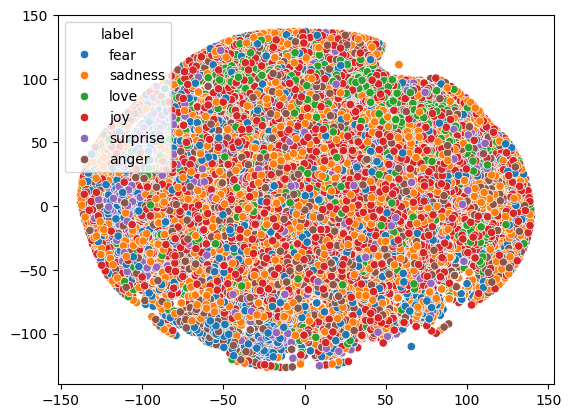

In [ ]:
# I will like to say that 180 minutes and I can understand this plot but no. I cannot get any data of this.
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features=300)
X = vec.fit_transform(data["text"])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.toarray())

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=data["label"])

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
data["sentiment"] = data["text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
data.head()

,text,label,word_count,sentiment
0,i just feel really helpless and heavy hearted,fear,8,-0.5095
1,ive enjoyed being able to slouch about relax a...,sadness,45,0.6234
2,i gave up my internship with the dmrg and am f...,fear,12,-0.4767
3,i dont know i feel so lost,sadness,7,-0.4572
4,i am a kindergarten teacher and i am thoroughl...,fear,42,-0.7590


In [10]:
from collections import Counter

def get_unique_words(texts):
    return set(word for text in texts for word in text.split())

for label in data["label"].unique():
    texts = data[data["label"] == label]["text"]
    print(f"Label {label}: {len(get_unique_words(texts))} unique words")

Label fear: 24539 unique words
Label sadness: 38615 unique words
Label love: 24417 unique words
Label joy: 47342 unique words
Label surprise: 14645 unique words
Label anger: 28441 unique words


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

for label in data["label"].unique():
    sub = data[data["label"] == label]
    vec = CountVectorizer(ngram_range=(2,3), stop_words='english').fit(sub["text"])
    freqs = vec.transform(sub["text"]).sum(axis=0)
    ngrams = [(word, freqs[0, idx]) for word, idx in vec.vocabulary_.items()]
    top_ngrams = sorted(ngrams, key=lambda x: x[1], reverse=True)[:10]
    print(f"\nTop n-grams for label {label}:")
    for phrase, count in top_ngrams:
        print(f"{phrase}: {count}")


Top n-grams for label fear:
feel like: 2992
im feeling: 2852
feeling little: 1321
feel little: 1072
feel pressured: 918
feeling bit: 864
feel uncomfortable: 786
feel bit: 773
feel threatened: 760
feel reluctant: 723

Top n-grams for label sadness:
feel like: 13158
im feeling: 5776
just feel: 2214
feeling little: 1885
like im: 1826
feeling like: 1619
feel little: 1530
feeling bit: 1440
feel like im: 1424
href http: 1317

Top n-grams for label love:
feel like: 4640
im feeling: 1858
feel blessed: 863
feel passionate: 824
feel loved: 756
feel sympathetic: 719
feeling generous: 717
feel accepted: 611
feel gentle: 590
feeling nostalgic: 491

Top n-grams for label joy:
feel like: 15746
im feeling: 7993
href http: 1932
make feel: 1749
feeling pretty: 1590
makes feel: 1481
like im: 1387
feeling like: 1346
just feel: 1312
feel pretty: 1294

Top n-grams for label surprise:
feel like: 1297
im feeling: 646
feel amazed: 619
feel weird: 579
feel strange: 541
feel amazing: 479
feeling overwhelmed: 47

<Axes: xlabel='label', ylabel='length'>

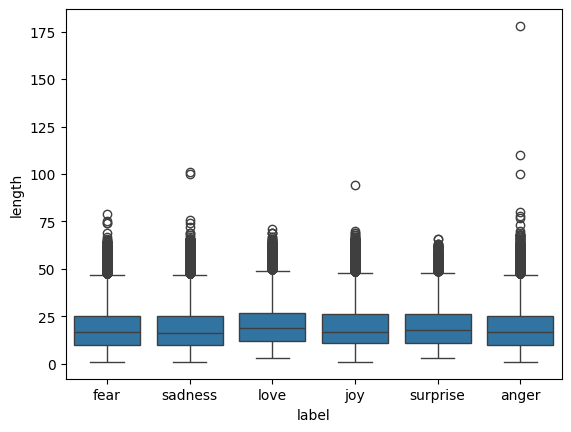

In [12]:
import seaborn as sns
data["length"] = data["text"].apply(lambda x: len(x.split()))
sns.boxplot(data=data, x="label", y="length")

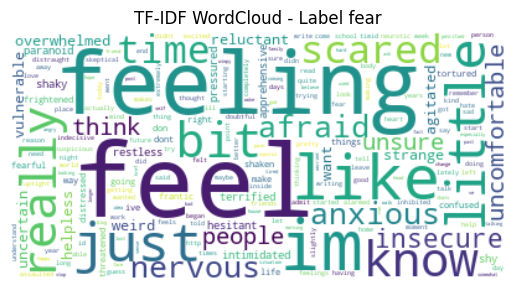

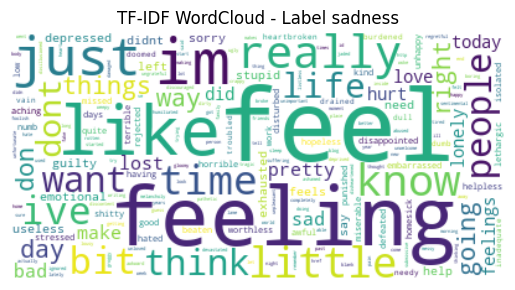

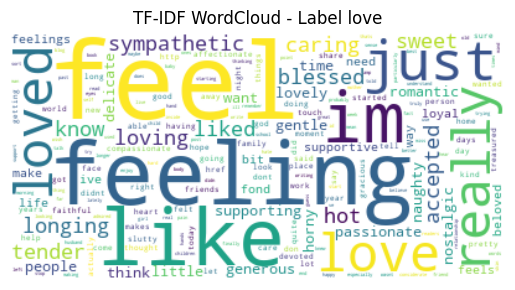

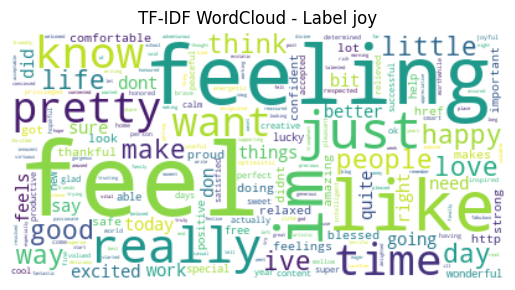

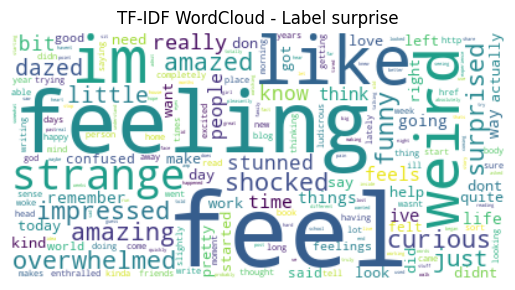

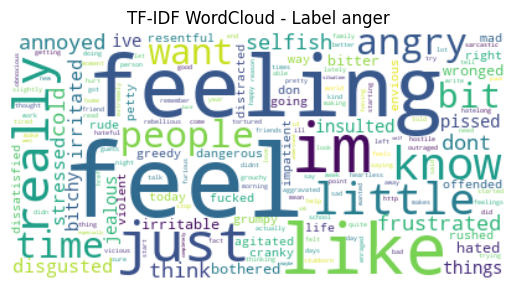

In [15]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

for label in data["label"].unique():
    texts = data[data["label"] == label]["text"]
    tfidf = TfidfVectorizer(stop_words="english", max_features=1000).fit(texts)
    scores = tfidf.transform(texts).mean(axis=0).A1
    vocab = tfidf.get_feature_names_out()
    wc = WordCloud(background_color="white").generate_from_frequencies(dict(zip(vocab, scores)))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"TF-IDF WordCloud - Label {label}")
    plt.axis("off")
    plt.show()

<Axes: >

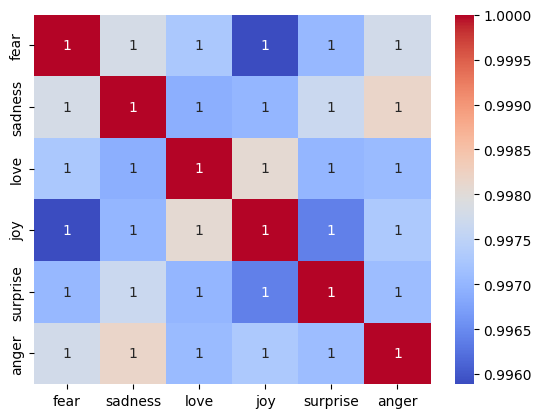

In [19]:
import numpy as np
import spacy
from sklearn.metrics.pairwise import cosine_similarity

nlp = spacy.load("en_core_web_md")  # or use small model for faster load

def get_avg_vector(texts):
    vectors = [nlp(t).vector for t in texts if nlp(t).has_vector]
    return np.mean(vectors, axis=0)

emotion_vecs = {}
for label in data["label"].unique():
    texts = data[data["label"] == label]["text"][:100]  # limit for speed
    emotion_vecs[label] = get_avg_vector(texts)

# Cosine similarity matrix
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

labels = list(emotion_vecs.keys())
matrix = cosine_similarity([emotion_vecs[l] for l in labels])
sim_df = pd.DataFrame(matrix, index=labels, columns=labels)
sns.heatmap(sim_df, annot=True, cmap="coolwarm")